#data analysis

In [1]:
import numpy as np 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [5]:
original_data=pd.read_csv("amazon_sales_data 2025.csv")
original_data.head()

,Order ID,Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status
0,ORD0001,14-03-25,Running Shoes,Footwear,60,3,180,Emma Clark,New York,Debit Card,Cancelled
1,ORD0002,20-03-25,Headphones,Electronics,100,4,400,Emily Johnson,San Francisco,Debit Card,Pending
2,ORD0003,15-02-25,Running Shoes,Footwear,60,2,120,John Doe,Denver,Amazon Pay,Cancelled
3,ORD0004,19-02-25,Running Shoes,Footwear,60,3,180,Olivia Wilson,Dallas,Credit Card,Pending
4,ORD0005,10-03-25,Smartwatch,Electronics,150,3,450,Emma Clark,New York,Debit Card,Pending


In [6]:
original_data.head()

,Order ID,Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status
0,ORD0001,14-03-25,Running Shoes,Footwear,60,3,180,Emma Clark,New York,Debit Card,Cancelled
1,ORD0002,20-03-25,Headphones,Electronics,100,4,400,Emily Johnson,San Francisco,Debit Card,Pending
2,ORD0003,15-02-25,Running Shoes,Footwear,60,2,120,John Doe,Denver,Amazon Pay,Cancelled
3,ORD0004,19-02-25,Running Shoes,Footwear,60,3,180,Olivia Wilson,Dallas,Credit Card,Pending
4,ORD0005,10-03-25,Smartwatch,Electronics,150,3,450,Emma Clark,New York,Debit Card,Pending


In [7]:
original_data.tail()

,Order ID,Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status
245,ORD0246,17-03-25,T-Shirt,Clothing,20,2,40,Daniel Harris,Miami,Debit Card,Cancelled
246,ORD0247,30-03-25,Jeans,Clothing,40,1,40,Sophia Miller,Dallas,Debit Card,Cancelled
247,ORD0248,05-03-25,T-Shirt,Clothing,20,2,40,Chris White,Denver,Debit Card,Cancelled
248,ORD0249,08-03-25,Smartwatch,Electronics,150,3,450,Emily Johnson,New York,Debit Card,Cancelled
249,ORD0250,19-02-25,Smartphone,Electronics,500,4,2000,Emily Johnson,Seattle,Amazon Pay,Completed


In [8]:
original_data.shape

(250, 11)

In [9]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Order ID           250 non-null    object
 1   Date               250 non-null    object
 2   Product            250 non-null    object
 3   Category           250 non-null    object
 4   Price              250 non-null    int64 
 5   Quantity           250 non-null    int64 
 6   Total Sales        250 non-null    int64 
 7   Customer Name      250 non-null    object
 8   Customer Location  250 non-null    object
 9   Payment Method     250 non-null    object
 10  Status             250 non-null    object
dtypes: int64(3), object(8)
memory usage: 21.6+ KB


In [10]:
original_data.describe()

,Price,Quantity,Total Sales
count,250.000000,250.000000,250.000000
mean,343.580000,2.856000,975.380000
std,380.635808,1.429489,1252.112254
min,15.000000,1.000000,15.000000
25%,40.000000,2.000000,100.000000
50%,150.000000,3.000000,400.000000
75%,600.000000,4.000000,1500.000000
max,1200.000000,5.000000,6000.000000


In [11]:
original_data.describe(include="O")

,Order ID,Date,Product,Category,Customer Name,Customer Location,Payment Method,Status
count,250,250,250,250,250,250,250,250
unique,250,60,10,5,10,10,5,3
top,ORD0001,10-02-25,Smartphone,Electronics,Emma Clark,Houston,PayPal,Completed
freq,1,10,35,118,32,32,60,88


In [13]:
list(original_data.columns)

['Order ID',
 'Date',
 'Product',
 'Category',
 'Price',
 'Quantity',
 'Total Sales',
 'Customer Name',
 'Customer Location',
 'Payment Method',
 'Status']

In [14]:
original_data.duplicated().sum()

np.int64(0)

In [16]:
original_data.isnull().sum().to_frame()

,0
Order ID,0
Date,0
Product,0
Category,0
Price,0
Quantity,0
Total Sales,0
Customer Name,0
Customer Location,0
Payment Method,0


In [17]:
category_sales =original_data.groupby('Category')['Total Sales'].sum().sort_values().to_frame()
category_sales

,Total Sales
Category,
Books,1035
Clothing,3540
Footwear,4320
Home Appliances,105000
Electronics,129950


In [18]:
top_products= original_data.groupby('Product')['Total Sales'].sum().sort_values(ascending=False).to_frame().head(3)
top_products

,Total Sales
Product,
Refrigerator,78000
Laptop,58400
Smartphone,48500


In [19]:
avg_price_category = original_data.groupby('Category')['Price'].mean().sort_values().to_frame()
avg_price_category

,Price
Category,
Books,15.000000
Clothing,30.000000
Footwear,60.000000
Electronics,375.423729
Home Appliances,960.000000


In [20]:
cleaned_data=original_data.copy()
cleaned_data.head()

,Order ID,Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status
0,ORD0001,14-03-25,Running Shoes,Footwear,60,3,180,Emma Clark,New York,Debit Card,Cancelled
1,ORD0002,20-03-25,Headphones,Electronics,100,4,400,Emily Johnson,San Francisco,Debit Card,Pending
2,ORD0003,15-02-25,Running Shoes,Footwear,60,2,120,John Doe,Denver,Amazon Pay,Cancelled
3,ORD0004,19-02-25,Running Shoes,Footwear,60,3,180,Olivia Wilson,Dallas,Credit Card,Pending
4,ORD0005,10-03-25,Smartwatch,Electronics,150,3,450,Emma Clark,New York,Debit Card,Pending


#data visualization

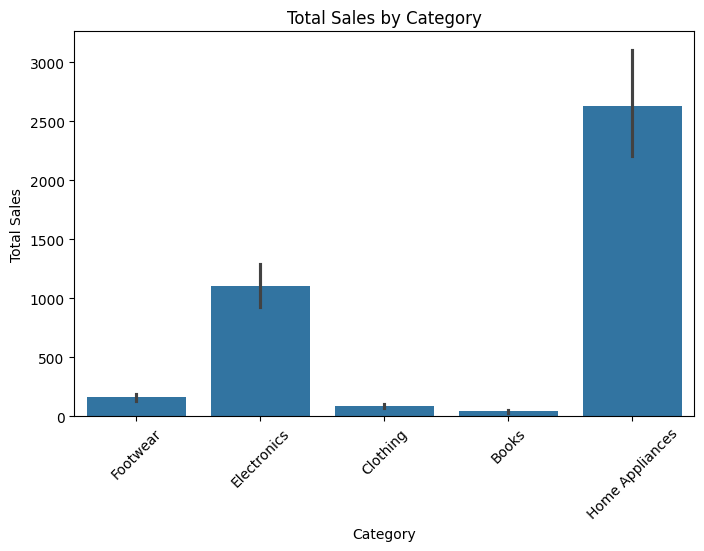

In [21]:
plt.figure(figsize=(8,5))
sns.barplot(cleaned_data, x='Category', y='Total Sales')
plt.title('Total Sales by Category')
plt.xticks(rotation=45)
plt.show()

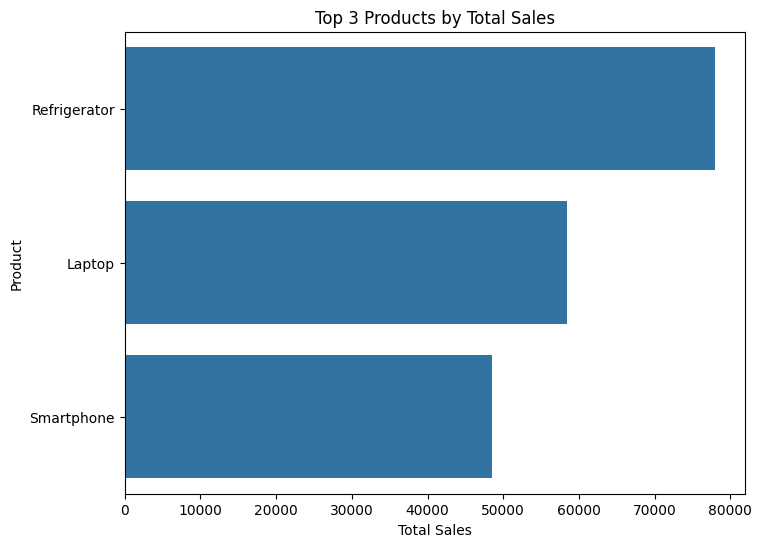

In [22]:
plt.figure(figsize=(8,6))
sns.barplot(data=top_products, y='Product', x='Total Sales')
plt.title('Top 3 Products by Total Sales')
plt.show()

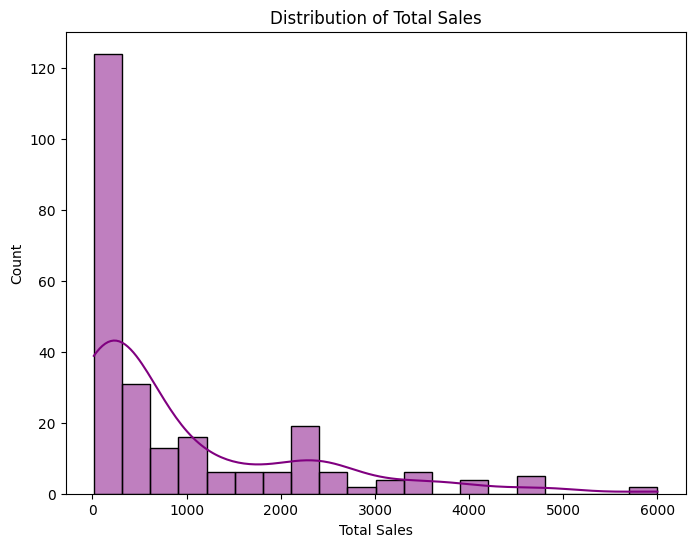

In [23]:
plt.figure(figsize=(8,6))
sns.histplot(cleaned_data['Total Sales'], bins=20, kde=True, color="purple")
plt.title('Distribution of Total Sales')
plt.xlabel('Total Sales')
plt.show()

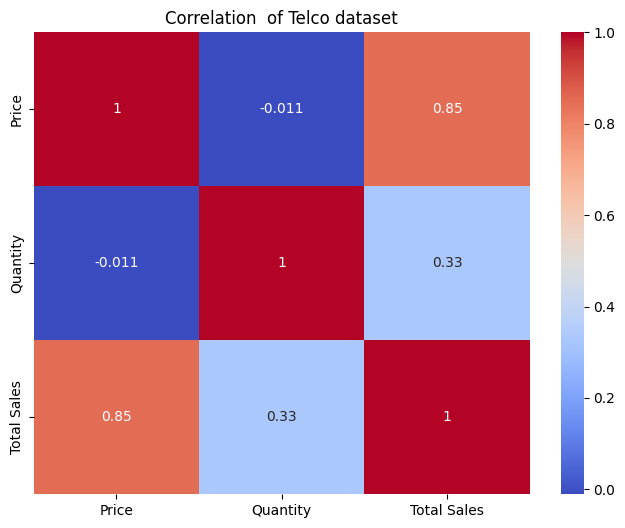

In [24]:
plt.figure(figsize=(8,6))
sns.heatmap(cleaned_data.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title('Correlation  of Telco dataset')
plt.show()

In [25]:
cleaned_data.to_csv("cleaned_amazon_sales_data 2025.csv",index=False)